In [28]:
import h5py

In [29]:
from numpy import *

In [30]:
murange = array([0, 0.2, 0.4])

In [7]:
fnames = ['data.hdf5', 'data_02.hdf5', 'data_04.hdf5', 'data_06.hdf5']

In [45]:
fnames = ['0.0/data.hdf5', '0.2/data.hdf5', '0.4/data.hdf5']

In [74]:
fnames = ['0.00/data.hdf5', '0.20/data.hdf5', '0.40/data.hdf5']

In [69]:
fnames = ['4ch_adaptive_E/data.hdf5', 'adE_mu0.2/data.hdf5', 'adE_mu0.4/data.hdf5']

In [73]:
folder = 'lowthr_HI/'

In [49]:
folder = '4ch/'

In [78]:
dfs = [h5py.File(folder+fname) for fname in fnames] 

In [79]:
Trange = dfs[0].attrs['Trange']
Tkeys = list(dfs[0].keys())

In [80]:
Tkeys

['170', '199', '230', '260', '290', '320', '349', '379']

In [81]:
GG = array(dfs[0]['170']['Q']['G'])

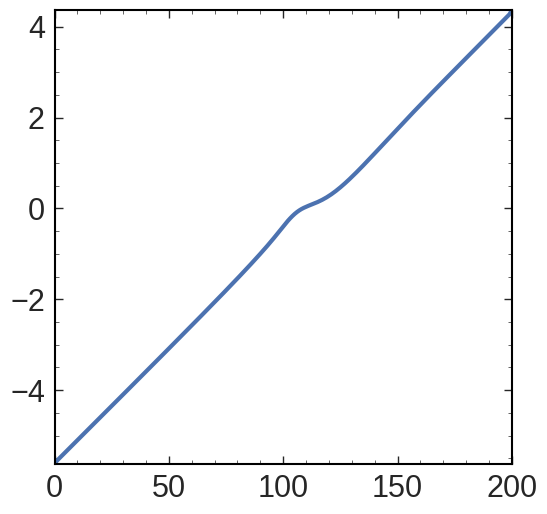

In [82]:
plt.plot(real(1/GG[:,0]))

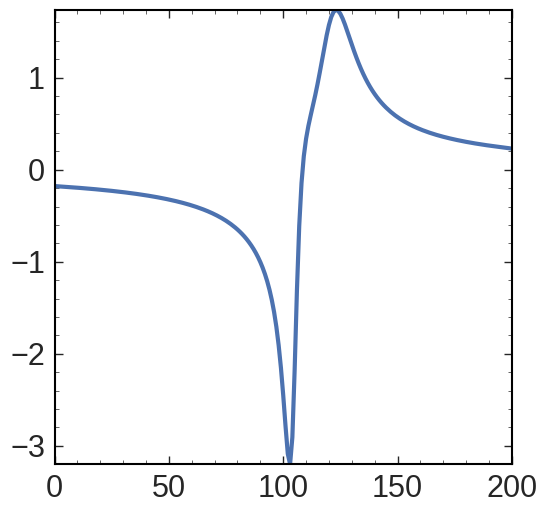

In [83]:
plt.plot(real(GG[:,0]))

In [84]:
Ps_mu = []

for df in dfs:
    Ps = []
    for Tkey in Tkeys:
        Ps += [float(df[Tkey].attrs['Ptot'])]
    Ps_mu += [Ps]

/tmp/ipykernel_197486/2081089261.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Ps += [float(df[Tkey].attrs['Ptot'])]


In [85]:
Ps_mu = array(Ps_mu)

In [86]:
Ps_mu.shape

(3, 8)

In [87]:
from scipy.optimize import least_squares

In [107]:
def fit_func(x, muT):
    return x[0]/2 * (muT)**2 + x[1]/4*(muT)**4

In [108]:
chi_02 = (Ps_mu[1] - 2*Ps_mu[0] + Ps_mu[1]) /Trange**4 / 0.2**2

In [109]:
chi_04 = (Ps_mu[2] - 2*Ps_mu[0] + Ps_mu[2]) / Trange**4 / 0.4**2

In [110]:
import matplotlib
matplotlib.style.use('publication')

0.170253
[0.08237492 0.08252635]
0.199455
[0.05880662 0.63178689]
0.230475
[ 0.22293921 -0.413534  ]
0.26044
[ 0.34705911 -1.7489118 ]
0.290258
[0.13672927 0.52171115]
0.320077
[-0.16456415  4.84082361]
0.349595
[-0.03464279  3.75096473]
0.379873
[ 0.44707422 -2.40753933]


(0.0, 0.25)

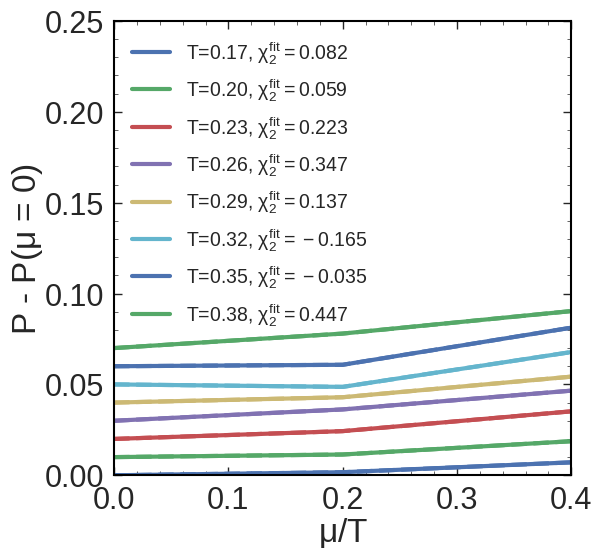

In [111]:
chis = []
for i in range(8):
    T = Trange[i]
    print(T)
    
    sol = least_squares(lambda z: fit_func(z, murange) - (Ps_mu[:, i] - Ps_mu[0, i])/T**4, [0.15, 0.2])
    sol
    
    
    print(sol.x)
    shift = 0.01*i
    l, = plt.plot(murange, shift + (Ps_mu[:, i] - Ps_mu[0, i])/T**4, label='T=%.2f, $\chi_2^{fit} = %.3f$'%(T, sol.x[0]))
    plt.plot(murange, shift + fit_func(sol.x, murange), ls='--', c=l.get_c())
    chis += [sol.x]
plt.legend(fontsize=14)

plt.xlabel('$\mu/T$')
plt.ylabel('P - P($\mu$ = 0)')
plt.savefig('Pmu_fit.pdf', bbox_inches='tight')

plt.ylim(0, 0.25)

Text(0.5, 0, 'T [GeV]')

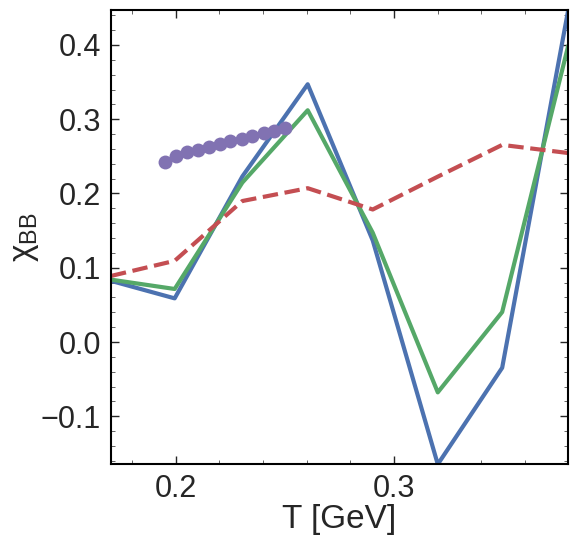

In [116]:
plt.plot(Trange, array(chis)[:, 0])
plt.plot(Trange, chi_02)
plt.plot(Trange, chi_04, ls='--')

plt.ylabel(r'$\chi_{BB}$')
plt.plot(chiBB.x, chiBB.Curve1, ls='none', marker='o')
plt.xlabel('T [GeV]')

In [101]:
import pandas as pd

In [102]:
chiBB = pd.read_csv('/home/const/MEGA/Physics/GrabbedFigures/LiuRapp2021/chiBB.csv')

Text(0.5, 0, 'T [GeV]')

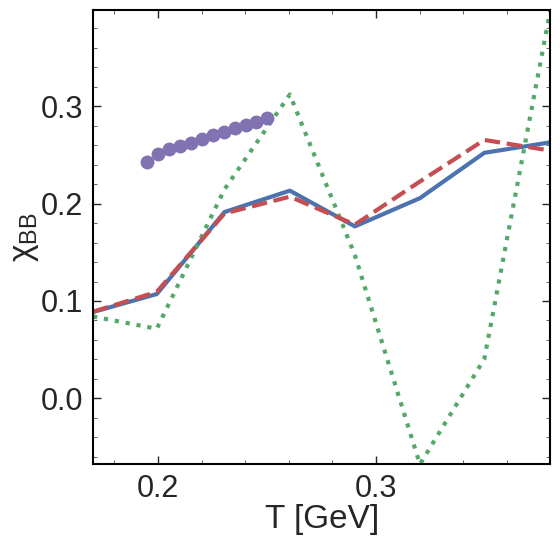

In [106]:
plt.plot(Trange, array(chis)[:, 0])
plt.plot(Trange, chi_02, ls=':')
plt.plot(Trange, chi_04, ls='--')
plt.ylabel(r'$\chi_{BB}$')
plt.plot(chiBB.x, chiBB.Curve1, ls='none', marker='o')
plt.xlabel('T [GeV]')